# 🔬 meta analysis

In [12]:
import sys
sys.path.append("../")

from bluer_sandbox import notebooks

import pandas as pd
import matplotlib.pyplot as plt

from bluer_options import string
from bluer_objects import objects, testing, storage

from bluer_amr.host import signature
from bluer_amr.logger import logger

logger.info(f"{'.'.join(signature())},\nbuilt on {string.pretty_date()}")

⚠️  matplotlib.font_manager Matplotlib is building the font cache; this may take a moment.
matplotlib.font_manager Failed to extract font properties from /System/Library/Fonts/Apple Color Emoji.ttc: In FT2Font: Could not set the fontsize (invalid pixel size; error code 0x17)
matplotlib.font_manager Failed to extract font properties from /System/Library/Fonts/LastResort.otf: tuple indices must be integers or slices, not str
matplotlib.font_manager Failed to extract font properties from /System/Library/PrivateFrameworks/FontServices.framework/Resources/Reserved/PingFangUI.ttc: In FT2Font: Can not load face (locations (loca) table missing; error code 0x90)
matplotlib.font_manager Failed to extract font properties from /System/Library/Fonts/Supplemental/NISC18030.ttf: In FT2Font: Could not set the fontsize (invalid pixel size; error code 0x17)
matplotlib.font_manager generated new fontManager
🔬  bluer_amr-6.8.1.bluer_ai-12.153.1.bluer_objects-6.133.1.bluer_options-5.108.1.Python 3.9.6.Darw

In [2]:
object_name = "amr-meta-analysis-v1"
# assert storage.download(object_name)

In [3]:
storage.ls(object_name)

(True,
 ['AMR%20Cholera%20obj%201%20clean%202.csv',
  'AMR%20Cholera%20obj%202%20clean%203.csv',
  'AMR%20Cholera%20obj%202%20clean%203.xlsx',
  'AMR%20Cholera%20obj%202%20titles.csv',
  'AMR%20Cholera%20obj1%20titles.csv',
  'data dictionary antibiotics.xlsx'])

In [4]:
data_dictionary = pd.read_excel(objects.path_of(object_name=object_name, filename="data dictionary antibiotics.xlsx"))
data_dictionary = data_dictionary.dropna()
data_dictionary

,antibiotic-number,antibiotic-name,antibiotic-abrrev
0,1,Amikacin,AK
1,2,Amoxicillin,AMX
2,3,Amoxicillin-Clavulanic acid,AMC
3,4,Ampicillin,AMP
4,5,Ampicillin-Sulbactam,AMS
...,...,...,...
65,71,Glycylcyclines,GCY
66,73,Mecillinam,MEL
67,74,Cephalothin,CFH
68,75,Sulfonamide,SUL


In [5]:
data_dictionary [data_dictionary['antibiotic-number']== 42]


,antibiotic-number,antibiotic-name,antibiotic-abrrev
41,42,Nalidixic acid,NAL


In [6]:
data_dictionary.columns

Index(['antibiotic-number', 'antibiotic-name', 'antibiotic-abrrev'], dtype='object')

In [7]:
df = pd.read_csv(objects.path_of(object_name=object_name, filename="AMR%20Cholera%20obj%202%20clean%203.csv"))
df

,study_id,redcap_repeat_instrument,strain_name,antibiotic-number,num_total,percent_suscept,percent_int,percent_resist
0,2,susceptibility_results,Vibrio cholerae Ogawa serotype,49,224,100.0,0.0,0.0
1,2,susceptibility_results,Vibrio cholerae Ogawa serotype,36,224,100.0,0.0,0.0
2,2,susceptibility_results,Vibrio cholerae Ogawa serotype,1,224,0.0,0.0,100.0
3,4,susceptibility_results,Vibrio cholerae O1 El Tor/Ogawa,51,20,0.0,0.0,100.0
4,4,susceptibility_results,Vibrio cholerae O1 El Tor/Ogawa,42,20,0.0,0.0,100.0
...,...,...,...,...,...,...,...,...
266,39,susceptibility_results,V. cholerae,49,80,99.0,0.0,1.0
267,39,susceptibility_results,V. cholerae,21,80,100.0,0.0,0.0
268,39,susceptibility_results,V. cholerae,51,80,95.0,1.0,4.0
269,39,susceptibility_results,V. cholerae,22,80,100.0,0.0,0.0


In [9]:
df_merged = df.merge(data_dictionary, on= 'antibiotic-number' , how='left')

df_merged

,study_id,redcap_repeat_instrument,strain_name,antibiotic-number,num_total,percent_suscept,percent_int,percent_resist,antibiotic-name,antibiotic-abrrev
0,2,susceptibility_results,Vibrio cholerae Ogawa serotype,49,224,100.0,0.0,0.0,Tetracycline,TET
1,2,susceptibility_results,Vibrio cholerae Ogawa serotype,36,224,100.0,0.0,0.0,Levofloxacin,LVX
2,2,susceptibility_results,Vibrio cholerae Ogawa serotype,1,224,0.0,0.0,100.0,Amikacin,AK
3,4,susceptibility_results,Vibrio cholerae O1 El Tor/Ogawa,51,20,0.0,0.0,100.0,Trimethoprim-Sulfamethoxazole,SXT
4,4,susceptibility_results,Vibrio cholerae O1 El Tor/Ogawa,42,20,0.0,0.0,100.0,Nalidixic acid,NAL
...,...,...,...,...,...,...,...,...,...,...
266,39,susceptibility_results,V. cholerae,49,80,99.0,0.0,1.0,Tetracycline,TET
267,39,susceptibility_results,V. cholerae,21,80,100.0,0.0,0.0,Chloramphenicol,CHL
268,39,susceptibility_results,V. cholerae,51,80,95.0,1.0,4.0,Trimethoprim-Sulfamethoxazole,SXT
269,39,susceptibility_results,V. cholerae,22,80,100.0,0.0,0.0,Ciprofloxacin,CIP


---

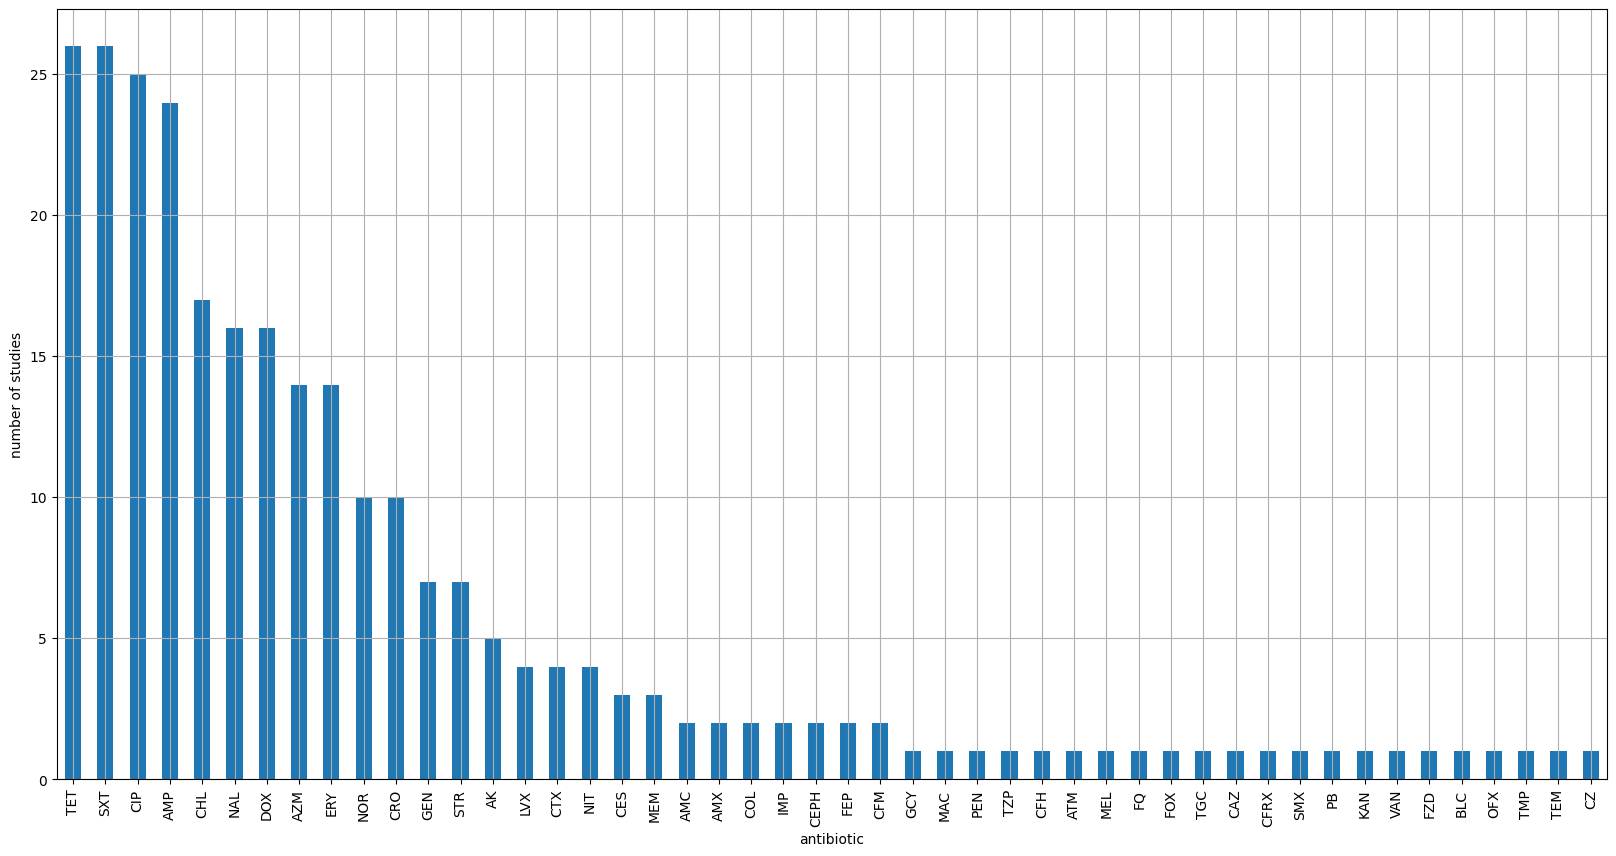

In [16]:
plt.figure(figsize=(20,10))
df_merged['antibiotic-abrrev'].value_counts().plot.bar()
plt.ylabel('number of studies')
plt.xlabel('antibiotic') 
plt.grid(True)
plt.show()

In [ ]:
logger.info("Hello World! 🪄")

---

In [ ]:
# assert notebooks.upload(object_name)

In [ ]:
# END